In [1]:
# Package imports and installs
import importlib
import subprocess
import sys

required_packages = {
    "matplotlib": "matplotlib",
    "seaborn": "seaborn",
    "pandas": "pandas",
    "requests": "requests"
}

for pkg_name, import_name in required_packages.items():
    if importlib.util.find_spec(import_name) is None:
        print(f"📦 Installing {pkg_name}...")
        subprocess.check_call([sys.executable, "-m", "pip", "install", pkg_name])
    else:
        print(f"✅ {pkg_name} already installed.")

# Now import all the packages
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import requests

    

✅ matplotlib already installed.
✅ seaborn already installed.
✅ pandas already installed.
✅ requests already installed.


In [2]:
# List of keywords
keywords = [
    "systems engineering",
    "system dynamics",
    "engineering systems",
    "systemic design",
    "soft systems methodology",
    "systems thinking",
    "complex adaptive systems",
    "transition research",
    "strategic niche management",
    "strategic transition management",
    "exploratory modeling",
    "life-cycle optimization",
    "operations research",
    "transport policy analysis"
]

In [3]:
# Base API endpoint for group_by queries
BASE_URL = "https://api.openalex.org/works"

# Function to fetch publication year counts using group_by
def fetch_publication_counts(keyword,journal_only=False):
    journal_only=journal_only
    if journal_only:
        params = {
            "search": keyword,
            "group_by": "publication_year",
            "mailto": "your_email@example.com",
            "filter": "primary_location.source.type:journal"

        }

    else:
        params = {
            "search": keyword,
            "group_by": "publication_year",
            "mailto": "your_email@example.com"
        }
    r = requests.get(BASE_URL, params=params)
    data = r.json()
    
    counts = {}
    try:
        for item in data["group_by"]:
            year = str(item["key"])
            counts[year] = item["count"]
    except Exception as e:
        print(f"Failed to parse group_by results for '{keyword}'. Error: {e}. Raw response: {data}")
    
    return counts

In [4]:
# Collect all results
all_data = {}
for kw in keywords:
    print(f"Processing: {kw}")
    all_data[kw] = fetch_publication_counts(kw)

Processing: systems engineering
Processing: system dynamics
Processing: engineering systems
Processing: systemic design
Processing: soft systems methodology
Processing: systems thinking
Processing: complex adaptive systems
Processing: transition research
Processing: strategic niche management
Processing: strategic transition management
Processing: exploratory modeling
Processing: life-cycle optimization
Processing: operations research
Processing: transport policy analysis


In [8]:
# Convert to long-format and filter by year
records = []
for keyword, yearly_counts in all_data.items():
    for year, count in yearly_counts.items():
        try:
            year_int = int(year)
            records.append({"Keyword": keyword, "Year": year_int, "Count": count})
        except ValueError:
            continue

df_long = pd.DataFrame(records)
df_long = df_long[(df_long["Year"] > 1950) & (df_long["Year"] < 2024)]

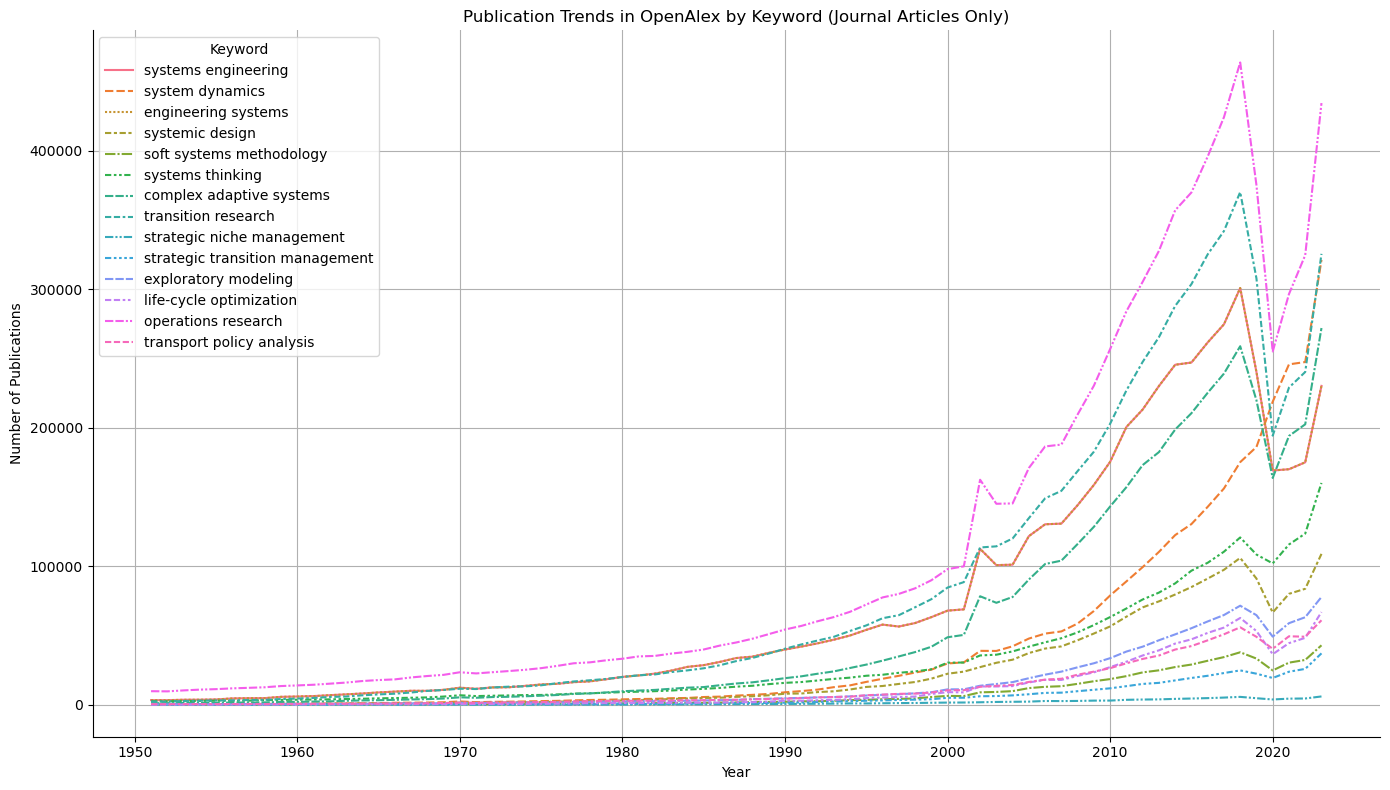

In [9]:
# Plot with seaborn
plt.figure(figsize=(14, 8))
sns.lineplot(data=df_long, x="Year", y="Count", hue="Keyword", style="Keyword")
sns.despine()
plt.title("Publication Trends in OpenAlex by Keyword (Journal Articles Only)")
plt.xlabel("Year")
plt.ylabel("Number of Publications")
plt.grid(True)
plt.tight_layout()

plt.show()


In [7]:
# Show and export
df_long.to_csv("openalex_keyword_trends_by_year.csv", index=False)
df_long.tail()

# %%

,Keyword,Year,Count
2325,transport policy analysis,1901,33
2327,transport policy analysis,1903,27
2328,transport policy analysis,1902,26
2329,transport policy analysis,1904,26
2333,transport policy analysis,1907,23
